In [1]:
from tsp_annealing import *
import matplotlib.pyplot as plt

In [21]:
def plot_TSP_solution(cities, permutation_method, **kwargs):
    plt.figure(figsize=(8, 6))
    plt.scatter([elem[0] for elem in cities], [elem[1] for elem in cities])
    plt.title('Map')

    distances = calculate_distances(cities)

    best_tour, best_distance, cost_over_iterations, temperature_over_interations = perform_annealing(distances, 
                                                                    altering_method=permutation_method, **kwargs)

    print("Best tour:", best_tour)
    print("Best distance:", best_distance)

    plot_tour(best_tour, cities, permutation_method)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(cost_over_iterations)
    plt.title('Tour Distance Over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Distance')
    plt.show()

    plt.plot(temperature_over_interations)
    plt.title('Temperature Over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Temperature')

    plt.show()

def best_distance(cities, permutation_method, **kwargs):
    distances = calculate_distances(cities)

    best_tour, best_tour_distance, cost_over_iterations, temperature_over_interations = perform_annealing(distances,
                                                                        altering_method=permutation_method, **kwargs)

    print("For the \'%s\' method"%(permutation_method))
    # print("Best tour:", best_tour)
    print("Best distance:", best_tour_distance)



In [22]:
cities = load_graph('TSP-Configurations/eil51.tsp.txt')
# plot_TSP_solution(cities, 'swap')
# plot_TSP_solution(cities, 'reverse')
# plot_TSP_solution(cities, 'insert')

best_distance(cities, 'reverse')
best_distance(cities, 'insert')

For the 'reverse' method
Best distance: 485.7550756359775
For the 'insert' method
Best distance: 506.6010515685233


In [23]:
cities = load_graph('TSP-Configurations/a280.tsp.txt')
# plot_TSP_solution(cities, 'swap')
# plot_TSP_solution(cities, 'reverse')

best_distance(cities, 'swap')
best_distance(cities, 'reverse')
best_distance(cities, 'insert')


For the 'swap' method
Best distance: 12551.25753998151
For the 'reverse' method
Best distance: 9059.49708814104
For the 'insert' method
Best distance: 12240.723404694443


Best tour: [11  4 48  8 20 28 19 34 35  2  1 37 36 14 43 16  3 17 13 24 12 40 39 18
 41 44 32 38  9 29 33 49 15 10 26  5 47 22 23 42  6 25  7 30 27 21  0 31
 45 50 46]
Best distance: 481.57620061206535


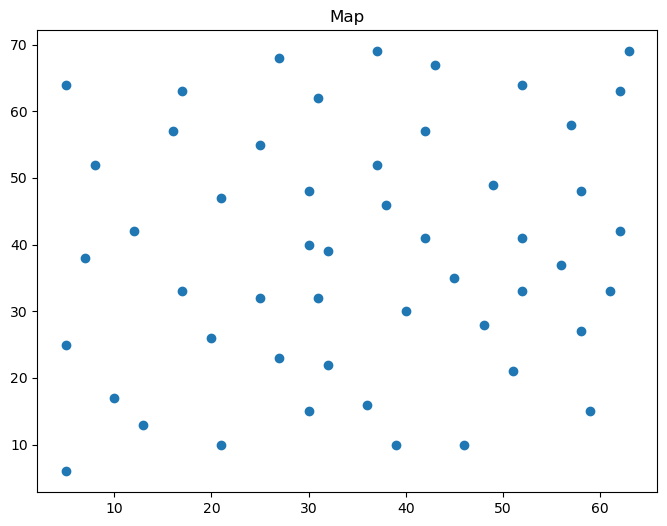

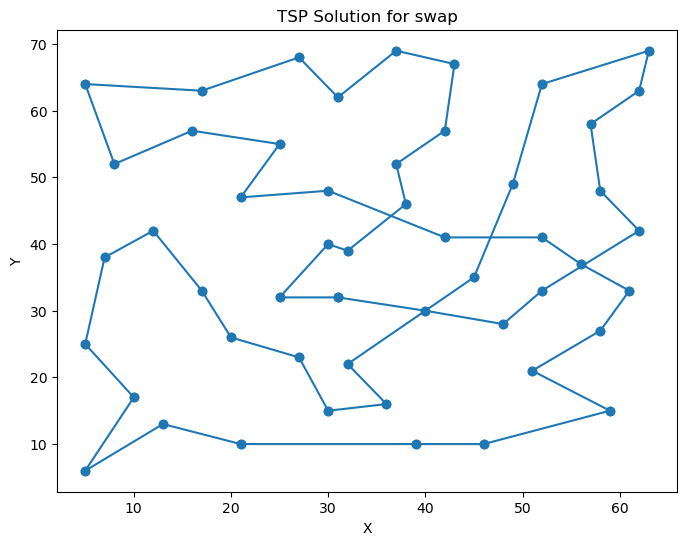

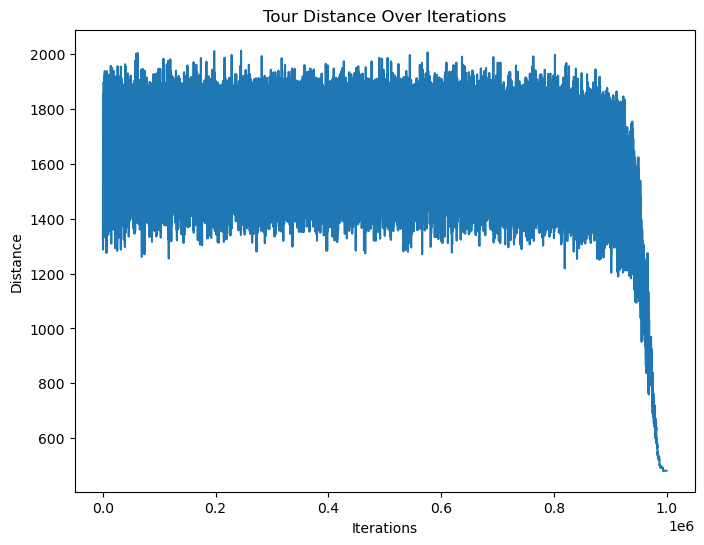

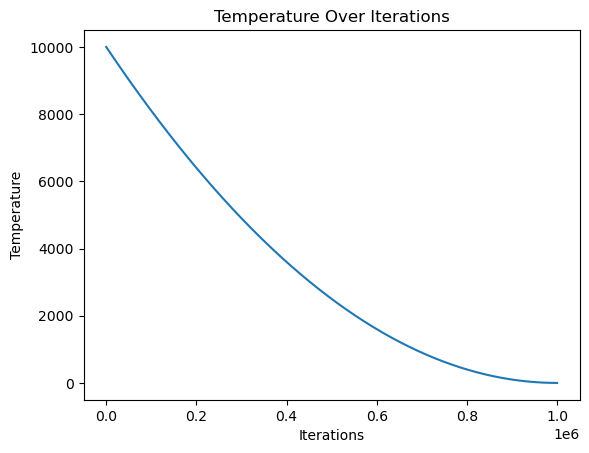

Best tour: [8, 49, 15, 1, 10, 37, 4, 48, 29, 33, 20, 28, 19, 34, 35, 2, 27, 30, 25, 7, 47, 23, 42, 6, 22, 5, 26, 0, 21, 31, 50, 45, 11, 46, 3, 17, 13, 24, 12, 40, 39, 18, 41, 43, 16, 36, 14, 44, 32, 38, 9]
Best distance: 450.0506509370072


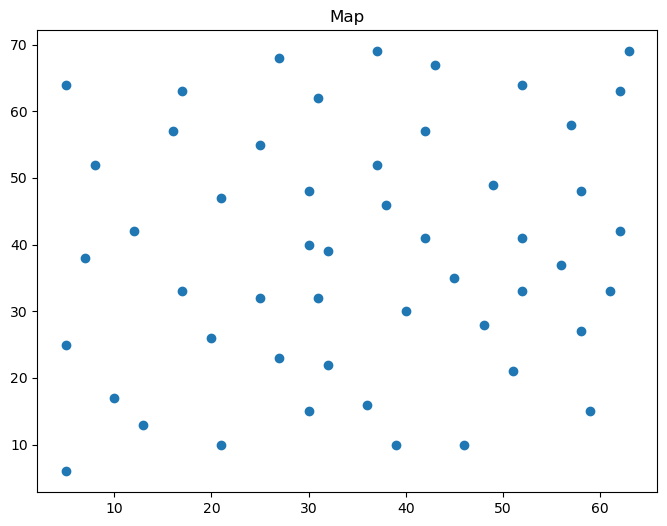

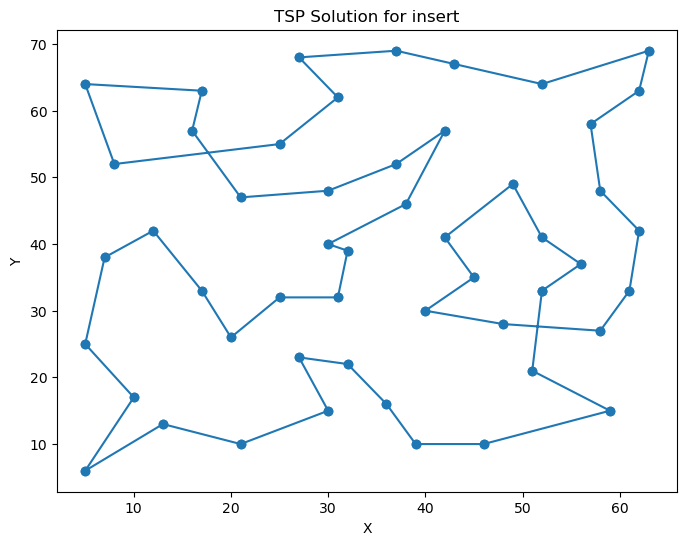

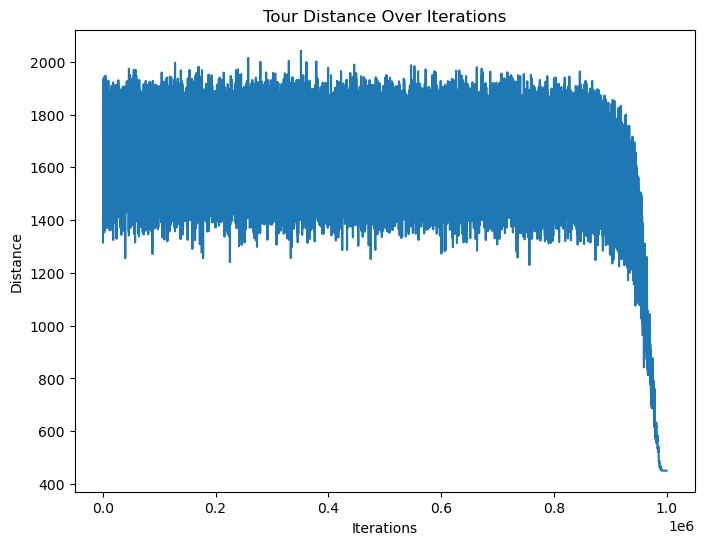

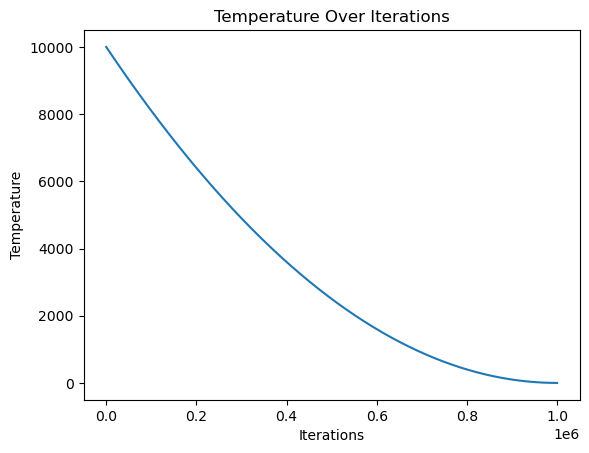

Best tour: [43 14 44 32 38  9 48 37 10 31  0 21  1 15 49  8 29 33 20 28 19 34 35  2
 27 30 25  7 47 22  6 42 23  5 26 50 45 46 11  4 36 16  3 17 13 24 12 40
 39 18 41]
Best distance: 435.2774344590523


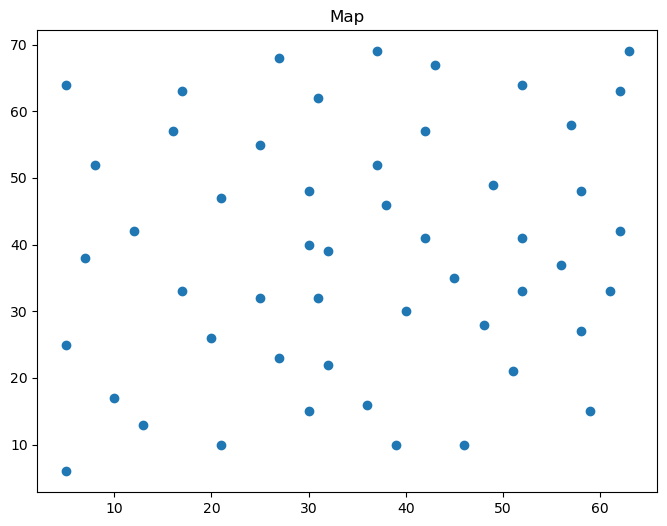

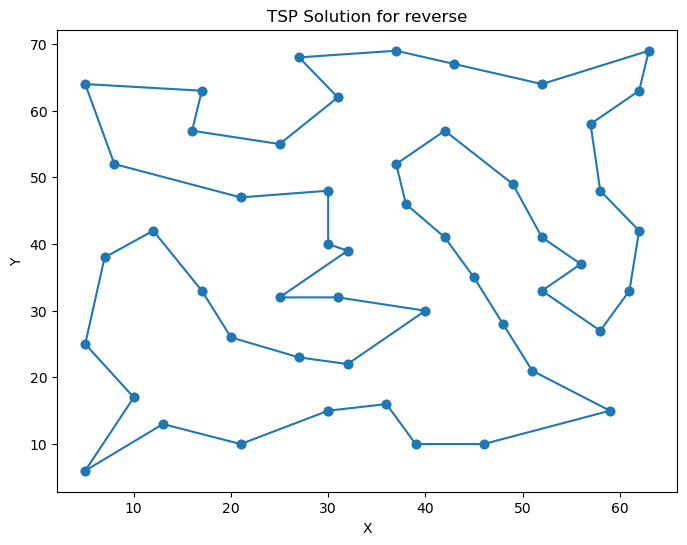

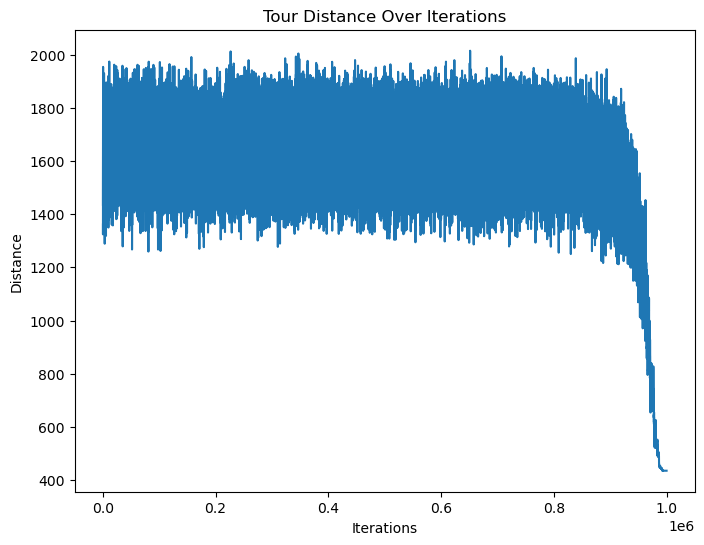

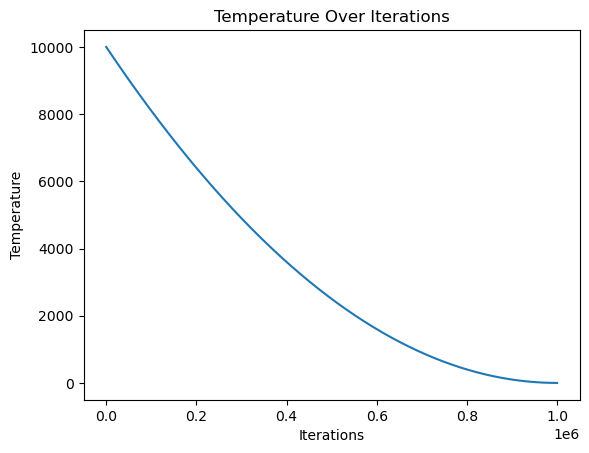

In [20]:
cities = load_graph('TSP-Configurations/eil51.tsp.txt')

max_iterations = int(1E6) 
final_temp = 1E-6
cooling_schedule = 'quadratic_a'
alpha = 1 - 1E-7

plot_TSP_solution(cities, 'swap',  max_iterations=max_iterations, final_temp=final_temp, 
                  cooling_schedule=cooling_schedule, alpha=alpha)
plot_TSP_solution(cities, 'insert',  max_iterations=max_iterations, final_temp=final_temp, 
                  cooling_schedule=cooling_schedule, alpha=alpha)
plot_TSP_solution(cities, 'reverse',  max_iterations=max_iterations, final_temp=final_temp, 
                  cooling_schedule=cooling_schedule, alpha=alpha)

In [9]:
cities = load_graph('TSP-Configurations/eil51.tsp.txt')
distances = calculate_distances(cities)

num_runs = 50
run_simulations(num_runs=num_runs, distances=distances, output='fitness_statistics')

(600.7399360697783, 32.334519597538154, (591.4572718123043, 610.0226003272523))

In [10]:
cities = load_graph('TSP-Configurations/eil51.tsp.txt')
distances = calculate_distances(cities)
max_iterations_list = range(100, 20000, 1000)
means, stds, conf_intervals = run_vary_maxiter(num_runs, distances, max_iterations_list)

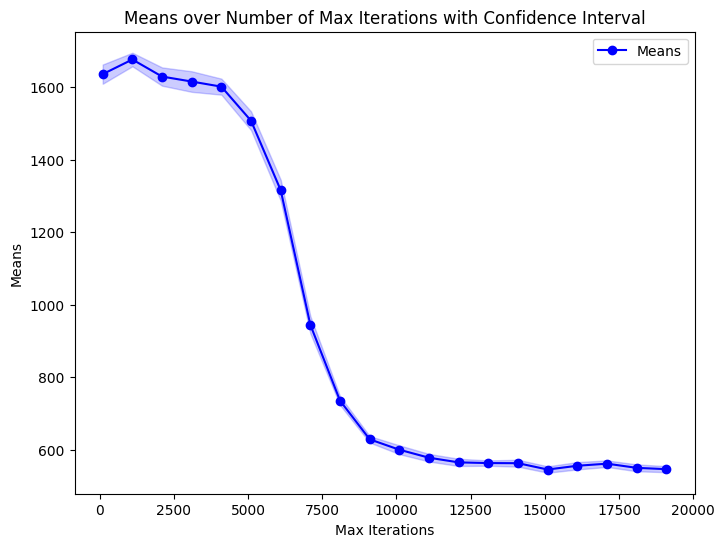

In [11]:
means = np.array(means)
lower_bounds = np.array([interval[0] for interval in conf_intervals])
upper_bounds = np.array([interval[1] for interval in conf_intervals])

plt.figure(figsize=(8, 6))
plt.plot(max_iterations_list, means, marker='o', linestyle='-', color='blue', label='Means')
plt.fill_between(max_iterations_list, lower_bounds, upper_bounds, alpha=0.2, color='blue')


plt.title('Means over Number of Max Iterations with Confidence Interval')
plt.xlabel('Max Iterations')
plt.ylabel('Means')
plt.legend()

plt.show()
